# Exploring Boston Airbnb Data

## 1. Overview of the Data

In [1]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calendar as cal

In [2]:
# Import the data
calendar = pd.read_csv('data/calendar.csv')
listings = pd.read_csv('data/listings.csv')

### a. Calendar data

In [3]:
# Check the shape and components of the calendar data
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [4]:
calendar.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [5]:
calendar.tail(2)

,listing_id,date,available,price
1308888,14504422,2016-09-07,f,NaN
1308889,14504422,2016-09-06,f,NaN


In [6]:
calendar[calendar['available'] == 't'].head(2)

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00


In [7]:
# Check if there's any missing values
def columns_with_null(df):
    '''
    Method to find columns with missing values
    
    Args:
        df: a Dataframe
        
    Returns:
        Dataframe: dataframe with column names, number of missing values, and percentage of missing values
    '''
    
    cols = df.columns[df.isnull().sum() > 0]
    df_null = pd.DataFrame(df[cols].isnull().sum().sort_values(), columns=['# of Nulls'])
    df_null['Null %'] = df[cols].isnull().mean().sort_values()
    return df_null

columns_with_null(calendar)

,# of Nulls,Null %
price,665853,0.508716


In [8]:
# Check if there's any wrong entry such that the price isn't null when the list is not available and vice versa
print(calendar[calendar['available'] == 'f']['price'].isnull().mean() == 1)
print(sum(calendar[calendar['available'] == 't']['price'].isnull()) == 0)

True
True


The data in calendar.csv includes theinformation about the avalability and price of the listings of Airbnb in Boston area for one year, from 2016-09-06 to 2017-09-05. Each enry includes the listing id, the date, and the availability of the listing property with the corresponding price at that date. <br/>
No missing value is found in the data except that about half of the entries have null values for the price, since the price information is unknown if the property is unavailable at that date.<br/>
Further information such as which time during the year are these properties most popular and which properties are most popular can be extracted later. Also, the format of the price and data columns need to be transformed. 

### b. Listings data

In [9]:
# Check the shape and components of the listings data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [10]:
pd.set_option('display.max_columns', 100)
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [11]:
# Check the numeric columns
listings_num = listings.select_dtypes(include=['float64', 'int64'])
print('In total %d columns with numeric values.' % len(listings_num.columns))
listings_num.columns

In total 33 columns with numeric values.


Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [12]:
# Check if each entry for a unique id
listings.shape[0] == len(listings['id'].unique())

True

In [13]:
# Check if there's any missing values
columns_with_null(listings)

,# of Nulls,Null %
city,2,0.000558
property_type,3,0.000837
beds,9,0.002510
bedrooms,10,0.002789
host_location,11,0.003068
market,14,0.003905
bathrooms,14,0.003905
zipcode,38,0.010600
summary,143,0.039888
host_neighbourhood,339,0.094561


The data in listings.csv includes a lot of information about listings and each entry represents the information about a unique entry. There are in total 95 columns and 33 of these are numeric columns<br/>
Quite a few columns in the dataset have missing values. For columns of jurisdiction_names, license, neighbourhood_group_cleansed, and has_availability with 100% missing values, we can simply drop these columns, for other columns, further engineering is required.<br/>
Questions like in which area the prices of propties are higher and how the average ratings is related to other factors such as price and zipcode can be explored. In addition, the predictive model for price can be constructed based on the dataset.

## 2. Analysis of the Data

### a. Clean the calendar data

In [14]:
# Transform the format of date
calendar_cleaned = calendar.copy()
calendar_cleaned['date'] = pd.to_datetime(calendar_cleaned['date'], format='%Y-%m-%d')

def price_reformat(df, col):
    '''
    Method to re-format the price into a float, i.e. $1,305.00 (str) -> 1305.00 (float)
    
    Args:
        df: a Dataframe
        col: string, the name of the column to transform
        
    Returns:
        Dataframe: the datafram with the selected column re-formatted
    '''
    
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)
    return df

price_reformat(calendar_cleaned, 'price')

calendar_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.9+ MB


We are interested in overall trend that how popular and price of the properties change with time. Fistyly, we have to group the data by time (here we choose to fistly group by month). 

In [15]:
# Create the column for month
calendar_cleaned['month'] = calendar_cleaned['date'].apply(lambda x: x.month)

In [16]:
# Group by month and calculate the corresponding availability and average price
calendar_avail = calendar_cleaned[calendar_cleaned['available'] == 't']
avail_by_month = calendar_avail.groupby('month')['available'].count().reset_index(name='counts').sort_values(by='month')
avail_by_month['month'] = avail_by_month['month'].apply(lambda x: cal.month_abbr[x])
price_by_month = calendar_avail.groupby('month')['price'].mean().reset_index(name='avg price').sort_values(by='month')
price_by_month['month'] = price_by_month['month'].apply(lambda x: cal.month_abbr[x])

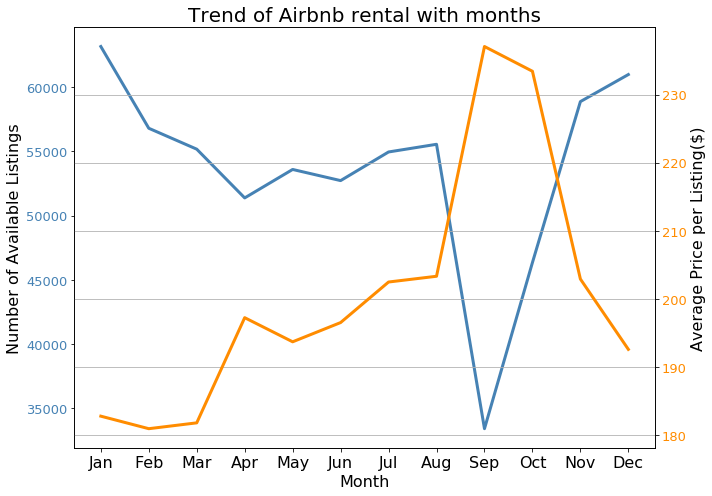

In [17]:
# Visualize the trend
fig, ax1 = plt.subplots(figsize=(10,7))
# fig.suptitle('Trend of Airbnb rental with months', fontsize = 20)

ax1.set_xlabel('Month', fontsize = 16)
ax1.set_ylabel('Number of Available Listings', fontsize = 16)
ax1.plot(avail_by_month['month'], avail_by_month['counts'], color = 'steelblue', lw = 3)
ax1.set_title('Trend of Airbnb rental with months', fontsize = 20)
ax1.tick_params(axis='y', labelcolor='steelblue', labelsize = 13)
ax1.tick_params(axis='x', labelsize = 16)

ax2 = ax1.twinx()

ax2.set_ylabel('Average Price per Listing($)', fontsize = 16)
ax2.plot(price_by_month['month'], price_by_month['avg price'], color = 'darkorange', lw = 3)
ax2.tick_params(axis='y', labelcolor='darkorange', labelsize = 13)

plt.grid(True)
plt.tight_layout()
plt.savefig('figs/time_trend.png', dpi = 300)
plt.show()

## 3. Modeling the Price